# EDA PROCESS ON DATASET

In [5]:
import numpy as np
import pandas as pd

In [6]:
#loading of data set
data1=pd.read_csv("diabetes.csv")

In [8]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [18]:
#Lets understand our dataset
mydata=data1.shift()[1:] #changing the indexing to start from 1
mydata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [17]:
mydata.info()
#he number of rows and columns, the total memory usage, the data type of each column, and the number of non-NaN elements

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [16]:
len(mydata) #total patients does the dataset have information about?

767

In [23]:
mydata.iloc[4,2] #the blood pressure of the patient number 5

40.0

In [30]:
mydata.iloc[112,7] #the age of the patient number 112

23.0

In [31]:
mydata.iloc[112,8]

0.0

In [32]:
mydata.groupby('Outcome').size()
#268 patients have diabetes

Outcome
0.0    499
1.0    268
dtype: int64

In [33]:
#lets see for missing values
mydata.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [35]:
mydata.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
# lets check for outliers
#in Glucose, BloodPressure, SkinThickness, Insulin and BMI (columns 1, 2, 3, 4 and 5 0-indexed)
print("Glucose",mydata[mydata.Glucose == 0].shape[0])
print("Blood pressure",mydata[mydata.BloodPressure == 0].shape[0])
print("Skin Thickness",mydata[mydata.SkinThickness == 0].shape[0])
print("Insulin",mydata[mydata.Insulin == 0].shape[0])
print("BMI",mydata[mydata.BMI == 0].shape[0])

Glucose 5
Blood pressure 35
Skin Thickness 227
Insulin 373
BMI 11


In [64]:
#lets drop the missing values of glucose, Blood pressure,BMI
#df =mydata[mydata.iloc[:,[1,2,5]] !=0]
#df=mydata.drop(mydata.loc[mydata['Glucose','BMI']==0].index, inplace=True)
df = mydata[(mydata[['Glucose','BMI']] != 0).all(axis=1)] 
#df.loc[(df!=0).any(axis=1)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
2,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
3,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
4,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               751 non-null    float64
 1   Glucose                   751 non-null    float64
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             751 non-null    float64
 4   Insulin                   751 non-null    float64
 5   BMI                       751 non-null    float64
 6   DiabetesPedigreeFunction  751 non-null    float64
 7   Age                       751 non-null    float64
 8   Outcome                   751 non-null    float64
dtypes: float64(9)
memory usage: 58.7 KB


In [76]:
df[['Pregnancies','Age']] = df[['Pregnancies','Age']].apply(pd.to_numeric,downcast='integer')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               751 non-null    int8   
 1   Glucose                   751 non-null    float64
 2   BloodPressure             751 non-null    float64
 3   SkinThickness             751 non-null    float64
 4   Insulin                   751 non-null    float64
 5   BMI                       751 non-null    float64
 6   DiabetesPedigreeFunction  751 non-null    float64
 7   Age                       751 non-null    int8   
 8   Outcome                   751 non-null    float64
dtypes: float64(7), int8(2)
memory usage: 48.4 KB


In [77]:
#Lets once again check for any missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Lets detect any outliers
Discover outliers using Z score
The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured.
Mostly a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [104]:
from scipy import stats
score = np.abs(stats.zscore(df))
#print(score)
threshold=3
print(sum(score <-3))
df_new = df[(score < 3).all(axis=1)]
df_new

[0 0 0 0 0 0 0 0 0]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148.0,72.0,35.0,0.0,33.6,0.627,50,1.0
2,1,85.0,66.0,29.0,0.0,26.6,0.351,31,0.0
3,8,183.0,64.0,0.0,0.0,23.3,0.672,32,1.0
4,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.0
6,5,116.0,74.0,0.0,0.0,25.6,0.201,30,0.0
...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,0.0,0.0,22.5,0.142,33,0.0
764,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0.0
765,2,122.0,70.0,27.0,0.0,36.8,0.340,27,0.0
766,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0.0


In [105]:
#Normalization of the dataset
#Normalization makes training less sensitive to the scale of features, so we can better solve for coefficients
from sklearn import preprocessing
# Get column names first
names = df_new.columns
names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 686 entries, 1 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               686 non-null    int8   
 1   Glucose                   686 non-null    float64
 2   BloodPressure             686 non-null    float64
 3   SkinThickness             686 non-null    float64
 4   Insulin                   686 non-null    float64
 5   BMI                       686 non-null    float64
 6   DiabetesPedigreeFunction  686 non-null    float64
 7   Age                       686 non-null    int8   
 8   Outcome                   686 non-null    float64
dtypes: float64(7), int8(2)
memory usage: 44.2 KB


In [108]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(df_new)
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [109]:
scaled_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.654591,0.921139,-0.033654,0.926428,-0.805269,0.216487,0.605247,1.476133,1.426674
1,-0.870713,-1.179974,-0.524862,0.536572,-0.805269,-0.849631,-0.364262,-0.185345,-0.700931
2,1.264713,2.088425,-0.688597,-1.347729,-0.805269,-1.352230,0.763319,-0.097899,1.426674
3,-0.870713,-1.046570,-0.524862,0.146717,0.237734,-0.621177,-1.010602,-1.059808,-0.700931
4,0.349530,-0.146093,0.130082,-1.347729,-0.805269,-1.001934,-0.891170,-0.272791,-0.700931
...,...,...,...,...,...,...,...,...,...
681,1.569773,-1.046570,-0.852333,-1.347729,-0.805269,-1.474072,-1.098420,-0.010453,-0.700931
682,1.874834,-0.646358,0.293818,1.771114,1.191971,0.109875,-0.996551,2.612934,-0.700931
683,-0.565652,0.054013,-0.197390,0.406620,-0.805269,0.703856,-0.402902,-0.535130,-0.700931
684,0.349530,0.020662,-0.033654,0.146717,0.437458,-0.910552,-0.736610,-0.272791,-0.700931


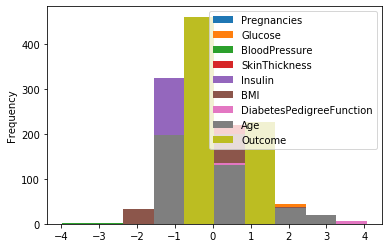

In [124]:
scaled_df.plot.hist(alpha=1)

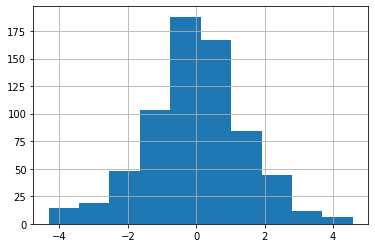

In [125]:
scaled_df['DiabetesPedigreeFunction'].diff().hist()

EDA is one of the most crucial aspects in any data science projects, and an absolutely must-have before commencement of any machine learning projects. Achieving a high degree of certainty and accuracy on the validity, interpretation and applicability of the data set and the project in general ensures desired business outcomes.

# The end